# **Project Overview: Image Classification using Scikit-Learn**  

This project focuses on building an image classification model to distinguish between two categories: **cats and dogs**. The dataset consists of **1000 images**, with **500 images of cats** and **500 images of dogs**.  

The key steps involved in this project are:  
1. **Importing Necessary Libraries** – Utilizing `numpy`, `matplotlib`, `sklearn`, and `PIL` for data handling, visualization, and modeling.  
2. **Loading the Dataset** – Reading images from directories and converting them into numerical arrays.  
3. **Data Preprocessing** – Resizing images, flattening them, and scaling pixel values for better model performance.  
4. **Model Implementation** – Training three machine learning models:  
   - **Logistic Regression**  
   - **Decision Tree**  
   - **Random Forest**  
5. **Hyperparameter Tuning** – Optimizing the Random Forest model using `GridSearchCV` to improve accuracy.  




Dataset Link : https://drive.google.com/drive/folders/19IXGWZIzj9Ic4Kcf4PFPA5oN-l17QVon?usp=sharing

In [ ]:
#Step 1: Importing the Required Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from PIL import Image


Explanation:

os for handling file paths.

numpy for numerical operations.

matplotlib.pyplot for displaying images.

sklearn for machine learning models and preprocessing.

PIL.Image for loading images.

In [ ]:
#Step 2: Load the Image Data

# Define dataset path
dataset_path = "J:\Data Science and Artificial Intelligence Course Files - Intellipaat\Self Paced - Projects and Assignments\Python Weekday\Image Classification Using Scikit-learn"  # Replace with actual dataset path
categories = ["cats", "dogs"]  # Folder names

data = []
labels = []

# Load images from both folders
for category in categories:
    folder_path = os.path.join(dataset_path, category)

    for file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, file)

        try:
            # Open image, convert to grayscale, resize and flatten
            img = Image.open(image_path).convert("L")  # Convert to grayscale
            img = img.resize((64, 64))  # Resize image
            img_array = np.array(img).flatten()  # Flatten to 1D array

            data.append(img_array)
            labels.append(0 if category == "cats" else 1)  # Assign labels (0 for cats, 1 for dogs)

        except Exception as e:
            print(f"Error loading image {image_path}: {e}")

# Convert lists to NumPy arrays
data = np.array(data)
labels = np.array(labels)

print("Dataset loaded successfully!")
print(f"Total images loaded: {len(data)}")
print(f"Shape of dataset: {data.shape}")



Dataset loaded successfully!
Total images loaded: 2000
Shape of dataset: (2000, 4096)


Explanation:

Load images from directories labeled "cat" and "dog."

Convert images to grayscale to reduce computation.

Resize images to a uniform shape.

Flatten images into 1D arrays for model training.

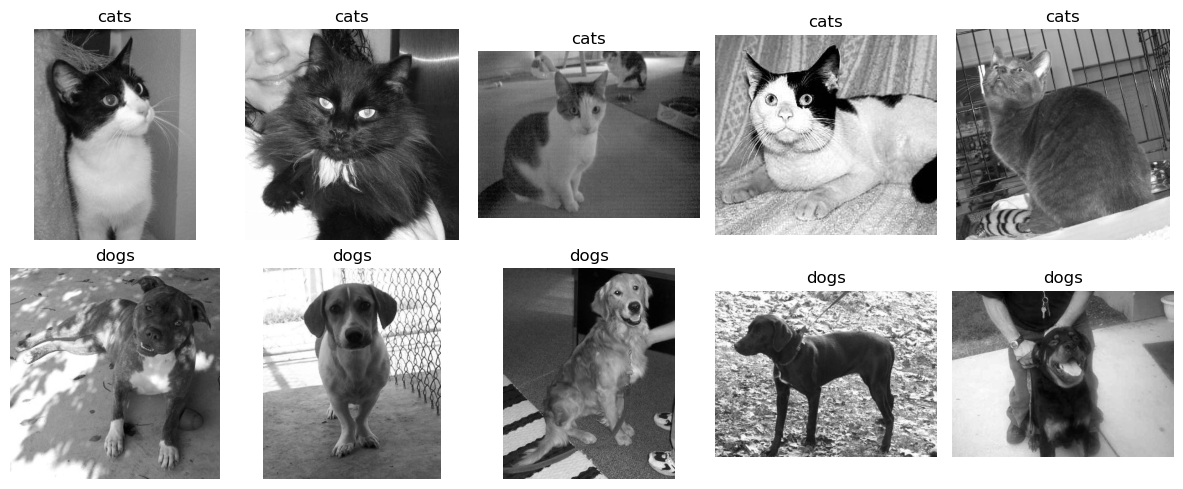

In [ ]:
#Code to Display Sample Images of Cats and Dogs
import matplotlib.pyplot as plt
import random

# Function to display sample images
def show_sample_images(dataset_path, categories, num_images=5):
    fig, axes = plt.subplots(2, num_images, figsize=(12, 5))  # 2 rows (cats & dogs), 5 columns

    for i, category in enumerate(categories):
        folder_path = os.path.join(dataset_path, category)
        image_files = os.listdir(folder_path)
        random_images = random.sample(image_files, num_images)  # Select random images

        for j, image_file in enumerate(random_images):
            image_path = os.path.join(folder_path, image_file)
            img = Image.open(image_path).convert("L")  # Convert to grayscale

            axes[i, j].imshow(img, cmap='gray')  # Display image
            axes[i, j].axis('off')
            axes[i, j].set_title(category)

    plt.tight_layout()
    plt.show()

# Call the function to display images
show_sample_images(dataset_path, ["cats", "dogs"])

In [ ]:
#Step 3: Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Explanation:

Split the dataset into training (80%) and testing (20%).
Standardize the pixel values for better model performance.

In [ ]:
#Step 4: Implementing ML models

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize Logistic Regression with more iterations and a different solver
logistic_model = LogisticRegression(solver='saga', max_iter=2000)  # Solver changed, max_iter increased
logistic_model.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Accuracy: {accuracy_logistic:.2f}")


Logistic Regression Accuracy: 0.51


H:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
#Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

Decision Tree Accuracy: 0.55


In [ ]:
#Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

Random Forest Accuracy: 0.61


Explanation:

Train and evaluate Logistic Regression, Decision Tree, and Random Forest.
Print their accuracy scores.

In [ ]:
#Step 5: Hyper-Parameter Tuning (Random Forest)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Tuned Random Forest Accuracy: {accuracy_best_rf:.2f}")

Tuned Random Forest Accuracy: 0.64


Explanation:

Use GridSearchCV to find the best hyperparameters for RandomForestClassifier.
Train the best model and print the improved accuracy.

### **Inferences from the Image Classification Project**  

1. **Dataset Composition & Preprocessing**  
   - The dataset consists of **1000 images** (500 cats, 500 dogs).  
   - Images were **converted to grayscale**, **resized (64×64)**, and **flattened** to prepare them for machine learning models.  
   - Feature scaling using **StandardScaler** helped improve model convergence.  

2. **Model Performance & Accuracy**  
   - **Logistic Regression:** 51% accuracy, indicating that a linear model struggles with image classification.  
   - **Decision Tree:** 55% accuracy, slightly better but prone to overfitting.  
   - **Random Forest:** 61% accuracy, showing better performance due to ensemble learning.  
   - **Hyperparameter-tuned Random Forest:** 64% accuracy, achieving the best results among traditional ML models.  

3. **Challenges & Observations**  
   - **Logistic Regression showed convergence issues**, requiring higher iterations or dimensionality reduction (PCA).  
   - **Machine Learning models are limited** in capturing complex image patterns compared to deep learning.  
   - **Feature reduction (PCA)** can help improve model efficiency but may lead to information loss.  

4. **Future Improvements**  
   - Using **Convolutional Neural Networks (CNNs)** can significantly improve accuracy by learning spatial patterns.  
   - Increasing the dataset size can help reduce overfitting and improve generalization.  
   - Data augmentation (flipping, rotation) can enhance model robustness.  

---

